# 

<center>

# INTRODUCTION TO AI AND TEXT ANALYTICS - EMATM0067
# INTRODUCTION TO AI - COURSEWORK
</center>

## Overview of the Task:

- As a part of coursework, Downloaded the Penguins dataset (`penguin.csv`) from the [ematm0067](https://github.com/ematm0067/2023_24/blob/main/coursework/penguins.csv) repository. Also, knows as Palmer Penguins Data. 
- This dataset contains the information about three different penguins.
- This task includes exploration of the dataset, visualisations and developing predictive models to predict the type of penguins by using suitable AI-ML algorithms.

### To set up the environment for analysis, it is important to begin with Importing necessary libraries:
*Let's begin the coursework, by installing all the libraries needed:*
- libraries needed for pre-processing to prediction 

In [58]:
import warnings
warnings.filterwarnings('ignore') ## to ignore the warnings
import pandas as pd  ## dataset loading
import numpy as np 
import matplotlib.pyplot as plt ## visualisations
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

In [59]:
!pip install plotly

In [60]:
sns.__version__

'0.12.2'

### Loading Data
- Loading the penguins data into python environment using pandas dataframe.
- Using *head()* function to check the contents of the data

In [61]:
## loading dataset
data = pd.read_csv('penguins.csv')
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# 1.  Brief Exploration of Data:
*Steps to understanding the data*
1. Data Preparation
2. Data preprocessing
3. Data Exploration (EDA)
4. Data Manipulations.. if needed
- The following steps gives an overview of size and shape of the data.

In [62]:
data.info() # summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


- *info()* function provides the summary of dataset, including count of non-null values and type of data presented in each column i.e. int, float, etc..

In [63]:
data.shape  #size and shape of the data

(344, 9)

Dataset consisted of 344 rows and 9 columns
- Variables are saved in columns.
- Observations are saved in rows.

In [64]:
data.size ## 344 x 9

3096

In [65]:
data.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

## Data Preprocessing
- Check the null values before proceeding deeper exploration.
- If missing values found do the suitable imputation if needed.

In [66]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [67]:
data.isnull().sum() ## count of missing values in each column

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

It is always important to identify the missing values before doing any kind of analysis.
Because, missing data can effect the accuracy and model's performance.

- Identifying null values helps in checking the quality of data
- Handling the missing values with appropriate imputation methods, or dropping them.

From this data, only few missing values are there.which is less then 20. Missing values are present in 4 numerical and 1 catergorical columns. I think ignoring this data of missing values cannot affect analysis.

Decided to impute the missing values:

In [68]:
## Imputing numerical columns with mean
n_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data[n_columns] = data[n_columns].fillna(data[n_columns].mean())

### We have null values in 4th columns/ crosss cheching how it is imputed 

In [69]:
data.iloc[3:4] ## how it is..imputed

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007


In [70]:
#data.head()

In [71]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

Importing categorical values using *mode()* function imputes with the most frequent value present in the 'Sex' column.
This model is not acceptable if we need good performance model, especially if the data is not evenly distributed.

It is better to drop:

In [72]:
print(data['sex'].unique())

['male' 'female' nan]


In [73]:
data = data.dropna(subset=['sex'])

In [74]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [75]:
data.drop(columns=['rowid'], inplace=True)   ### lets drop rowid..its just aserial number

In [76]:
data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [77]:
data['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

## Data Exploration
- Understanding and exploring more about data
- To get more meaningful insights

In [78]:
data.shape ## shape changed after preprocessing

(333, 8)

In [79]:
data.count() ## count of values

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
year                 333
dtype: int64

In [80]:
data.describe(include='all') # statistical summary 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


- *describe()* function gives the basic descriptive and statistical summary like mean, standard deviation etc.. for each column

In [81]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0
year,333.0,2008.042042,0.812944,2007.0,2007.0,2008.0,2009.0,2009.0


In [82]:
data.describe(include=['O'])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [83]:
data.nunique()  ##distinct values count in each column

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
year                   3
dtype: int64

In [84]:
pd.concat({"Unique values" : data.apply(pd.unique), "Num" : data.nunique()}, axis=1)

,Unique values,Num
species,"[Adelie, Gentoo, Chinstrap]",3
island,"[Torgersen, Biscoe, Dream]",3
bill_length_mm,"[39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41....",163
bill_depth_mm,"[18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17....",79
flipper_length_mm,"[181.0, 186.0, 195.0, 193.0, 190.0, 182.0, 191...",54
body_mass_g,"[3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625....",93
sex,"[male, female]",2
year,"[2007, 2008, 2009]",3


- There are three different species in three islands and they recorded the observesations for 3 years.

### Dataset consisted of the following information
#### The penguin dataset contains observations of penguins with the following attributes:

|variable          |class-type| description |
|:-----------------|:-------  |:----------- |
|species           |integer   | Penguin species (Adelie, Gentoo, Chinstrap) |
|island            |integer   | Island where recorded (Biscoe, Dream, Torgersen) |
|bill_length_mm    |double    | Bill length in millimeters (also known as culmen length) |
|bill_depth_mm     |double    | Bill depth in millimeters (also known as culmen depth) |
|flipper_length_mm |integer   | Flipper length in mm |
|body_mass_g       |integer   | Body mass in grams |
|sex               |integer   | sex of the animal |
|year              |integer   | year recorded |

- The main measurements are body mass, culmen (bill) length, bill depth, and flipper length.
- Recorded the observations between 2007 to 2009.

### Statistical Summary:
- This is the summary of all three penguins:
1. bill lengths of penguins range from 32.1 mm to 59.6 mm, with an average of about 43.99 mm.
2. bill depths of penguins vary from 13.1 mm to 21.5 mm, averaging 17.16 mm.
3. Flipper lengths of penguins are between 172 mm and 231 mm, with an average around 200.96 mm.
4. Body masses of penguins are in the range of 2700 g to 6300 g, with an average weight of about 4201.05 g.

These measures like mean, median, mode, standard deviation, and range give you a quick overview of the numerical columns, and for categorical data, there is a frequency of each category.

### Visualisations:

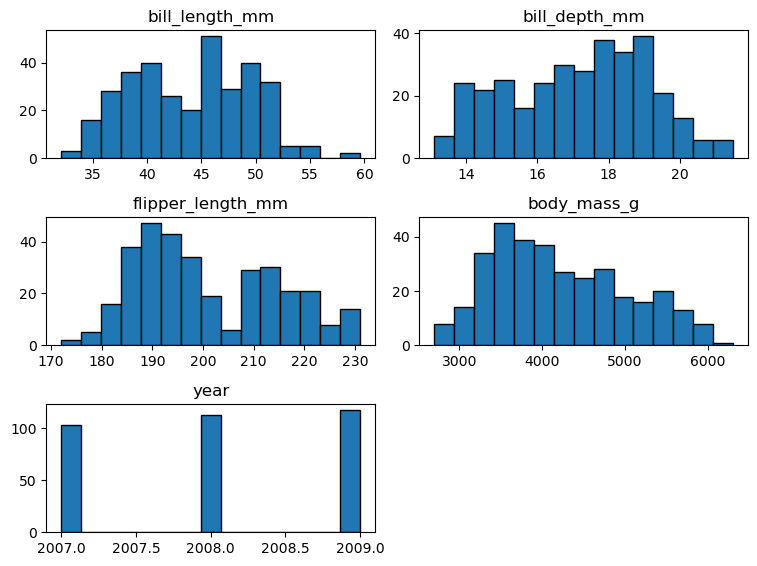

In [85]:
## Plotting histograms 
data.hist(bins=15,edgecolor='black',grid=False)    
## Set size for better readability
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

- Based on the histograms shows the distributions of penguin physical measurements and observation years.
1. Bill Length (mm)
Key Insight: Shows variability in bill sizes, suggesting different penguin species or gender differences within the species.
Implication: Useful for identifying species or studying evolutionary traits.
2. Bill Depth (mm)
Key Insight: Multiple peaks indicate variations that could be tied to species differences or adaptations to different diets.
Implication: Bill depth can inform on dietary habits and habitat preferences.
3. Flipper Length (mm)
Key Insight: Relatively normal distribution with a slight skew, indicating consistent trait measurements within the population.
Implication: Indicates less variation in flipper length among the penguins, important for studies on mobility and energy expenditure.
4. Body Mass (g)
Key Insight: Right-skewed distribution suggests most penguins fall within a common weight range, but there are exceptions with higher weights.
Implication: Body mass is crucial for assessing health and survival strategies, such as fat reserves for breeding.
5. Year of Observation
Key Insight: Most data were collected in 2007 and 2008, with very few in 2009.
Implication: Useful for short-term ecological studies but limited for tracking long-term trends.


#### A. Distribution of Species: 
- count of penguins in each type

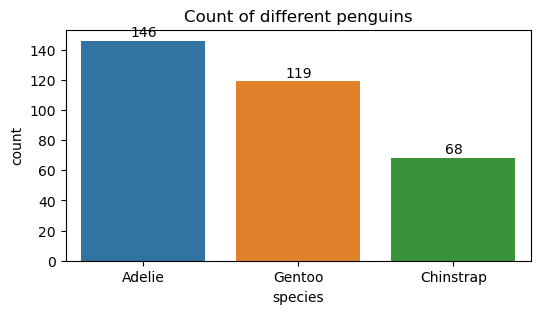

In [86]:
## count of penguins in each type:
plt.figure(figsize=(6,3))
sns.countplot(x="species", data=data)
## to show the count on top of each bar
for index, value in enumerate(data['species'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
    plt.title('Count of different penguins')
plt.show()

This chart highlights differences in sample sizes between species:
- Adelie: This is the most common species in the dataset with 146 individuals.
- Gentoo: The second most common, represented by 119 individuals.
- Chinstrap: The least common among the sampled penguins with 68 individuals.

#### B. Spread of penguins across islands
- How many islands??
- whats the popular destination?

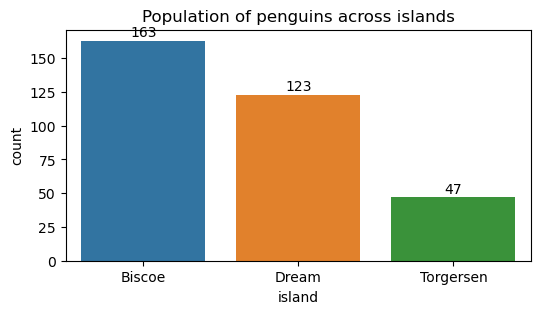

In [87]:
## How many islands??
plt.figure(figsize=(6,3))
sns.countplot(x="island", data=data,order=["Biscoe", "Dream", "Torgersen"])
## to show the count on top of each bar
for index, value in enumerate(data['island'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
    plt.title('Population of penguins across islands')
plt.show()

#### Observations on Penguins Population in 3 different islands:
- Biscoe Island has the highest number of penguin observations with 163 individuals. This suggests that Biscoe Island might be a primary habitat or a popular study site for these penguins. (This could be due to favorable environmental conditions such as optimal nesting sites, abundant food supply, or fewer predators. )
- Dream Island has the  second highest no.of penguins with 123 observations.
- Torgersen Island has the fewest observations with only 47. Smaller penguin population, less frequent research activity, or perhaps less accessibility compared to the other islands.

#### C. How many penguins in each gender? 

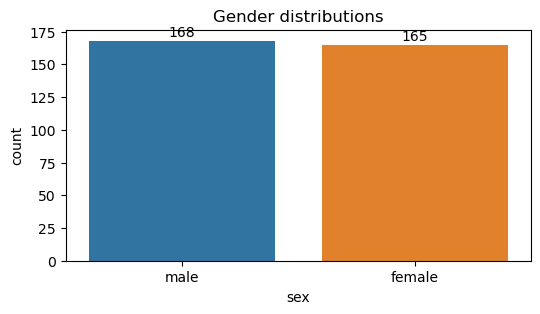

In [88]:
plt.figure(figsize=(6,3))
sns.countplot(x="sex", data=data)
## to show the count on top of each bar
for index, value in enumerate(data['sex'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
    plt.title('Gender distributions')
plt.show()

<Axes: title={'center': 'Gender distributions'}, ylabel='sex'>

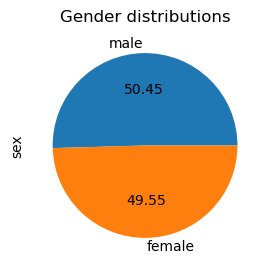

In [89]:
data.sex.value_counts().plot(kind='pie',figsize=[5,3],autopct='%.2f', title='Gender distributions')
## autopct- auto percentage 

#### Balanced Gender Distribution
- The counts for males (168) and females (165) are almost equal.
- sample is well-balanced in terms of gender

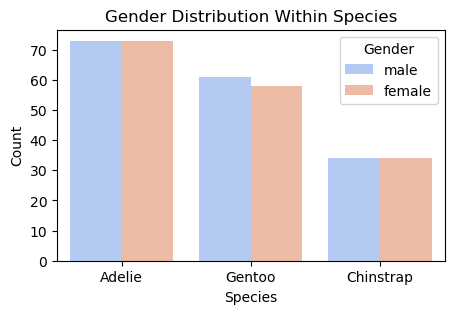

In [90]:
# Visualization: Gender Distribution Within Each Species
plt.figure(figsize=(5,3))
sns.countplot(x='species', hue='sex', data=data, palette='coolwarm')
plt.title('Gender Distribution Within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

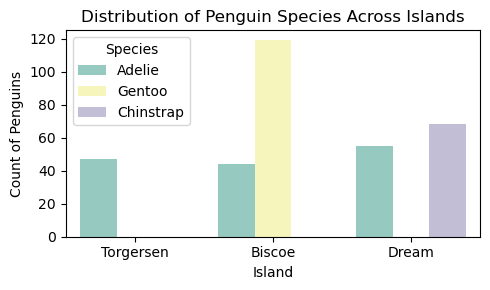

In [91]:
# Setting the aesthetic style of the plots
#sns.set_style("whitegrid")

# Visualization 10: Distribution of Penguin Species across Islands
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='island', hue='species', palette='Set3')
plt.title('Distribution of Penguin Species Across Islands')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

### Finding relationship between columns
### 1. Does an increase in bill length correspond to an increase in body mass?

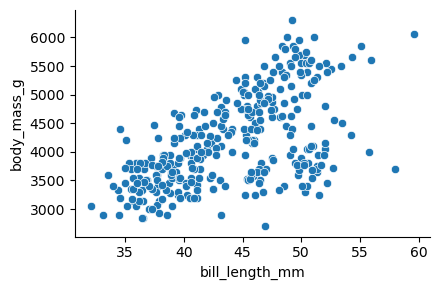

In [92]:
sns.relplot(data=data, x='bill_length_mm',y='body_mass_g',height=3, aspect=1.5)

### Positve correlation:
There is a clear trend where larger bill lengths tend to be associated with higher body mass. This suggests that as penguins grow larger bills, their overall body mass also tends to increase.

but the relationship is not perfectly linear, and there is noticeable scatter, especially as bill length increases.

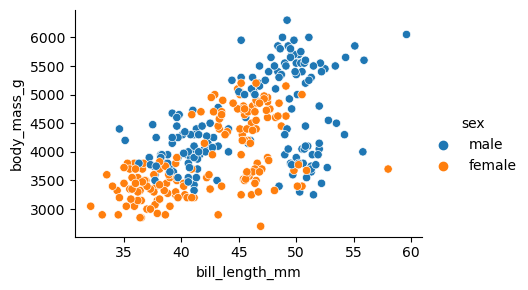

In [93]:
sns.relplot(data=data, x='bill_length_mm',y='body_mass_g',height=3, aspect=1.5, hue='sex')

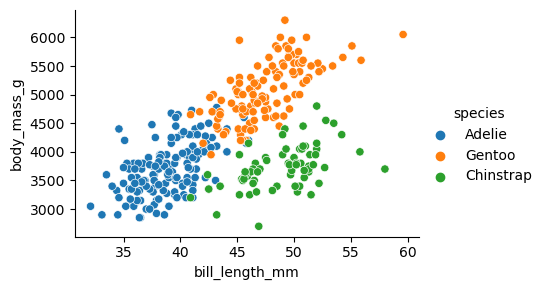

In [94]:
sns.relplot(data=data, x='bill_length_mm',y='body_mass_g',height=3, aspect=1.5, hue='species')

### 2. Does an increase in bill depth correspond to an increase in body mass?

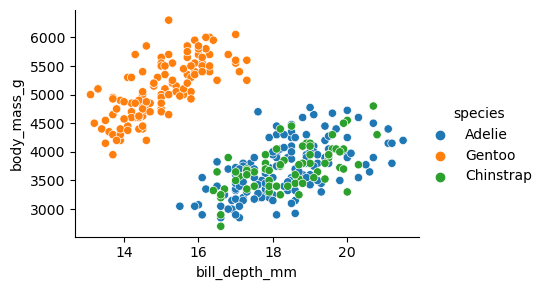

In [95]:
sns.relplot(data=data, x='bill_depth_mm',y='body_mass_g',height=3, aspect=1.5, hue='species')

### 3. Does an increase in flipper length correspond to an increase in body mass?

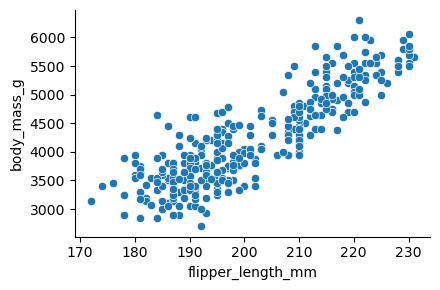

In [96]:
sns.relplot(data=data, x='flipper_length_mm',y='body_mass_g', height=3, aspect=1.5)

### Positive Correlation: 
There is a visible positive correlation between flipper length and body mass. Penguins with longer flippers generally have a higher body mass. This trend is quite linear, suggesting a strong relationship between these two physical attributes.

In [97]:
#sns.relplot(data=data, x='flipper_length_mm',y='body_mass_g', height=3, aspect=1.5,hue='sex')

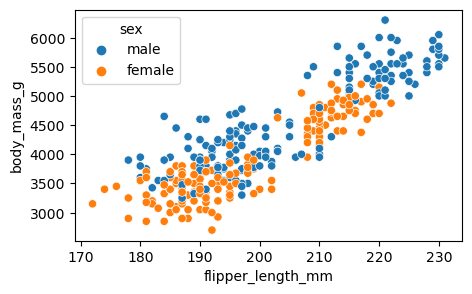

In [98]:
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
plt.figure(figsize=(5,3))
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='sex')

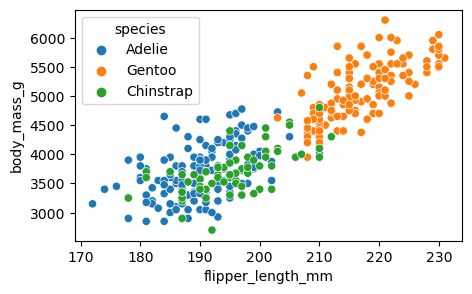

In [99]:
#sns.relplot(data=data, x='flipper_length_mm',y='body_mass_g', height=3, aspect=1.5, hue='species')
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
plt.figure(figsize=(5,3))
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='species')

### 4. Does an increase in bill length correspond to an increase in bill depth?

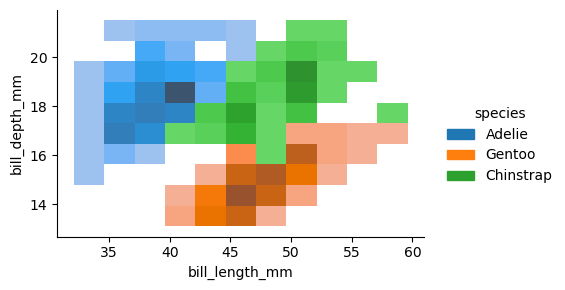

In [100]:
#plt.figure(figsize=(1,1))
sns.displot(data, x="bill_length_mm", y="bill_depth_mm",height=3, aspect=1.5, hue="species")

### Visualization 17: Comparison of Physical Characteristics Across Species
- For this, create a pair plot to visualize the relationships between all physical characteristics

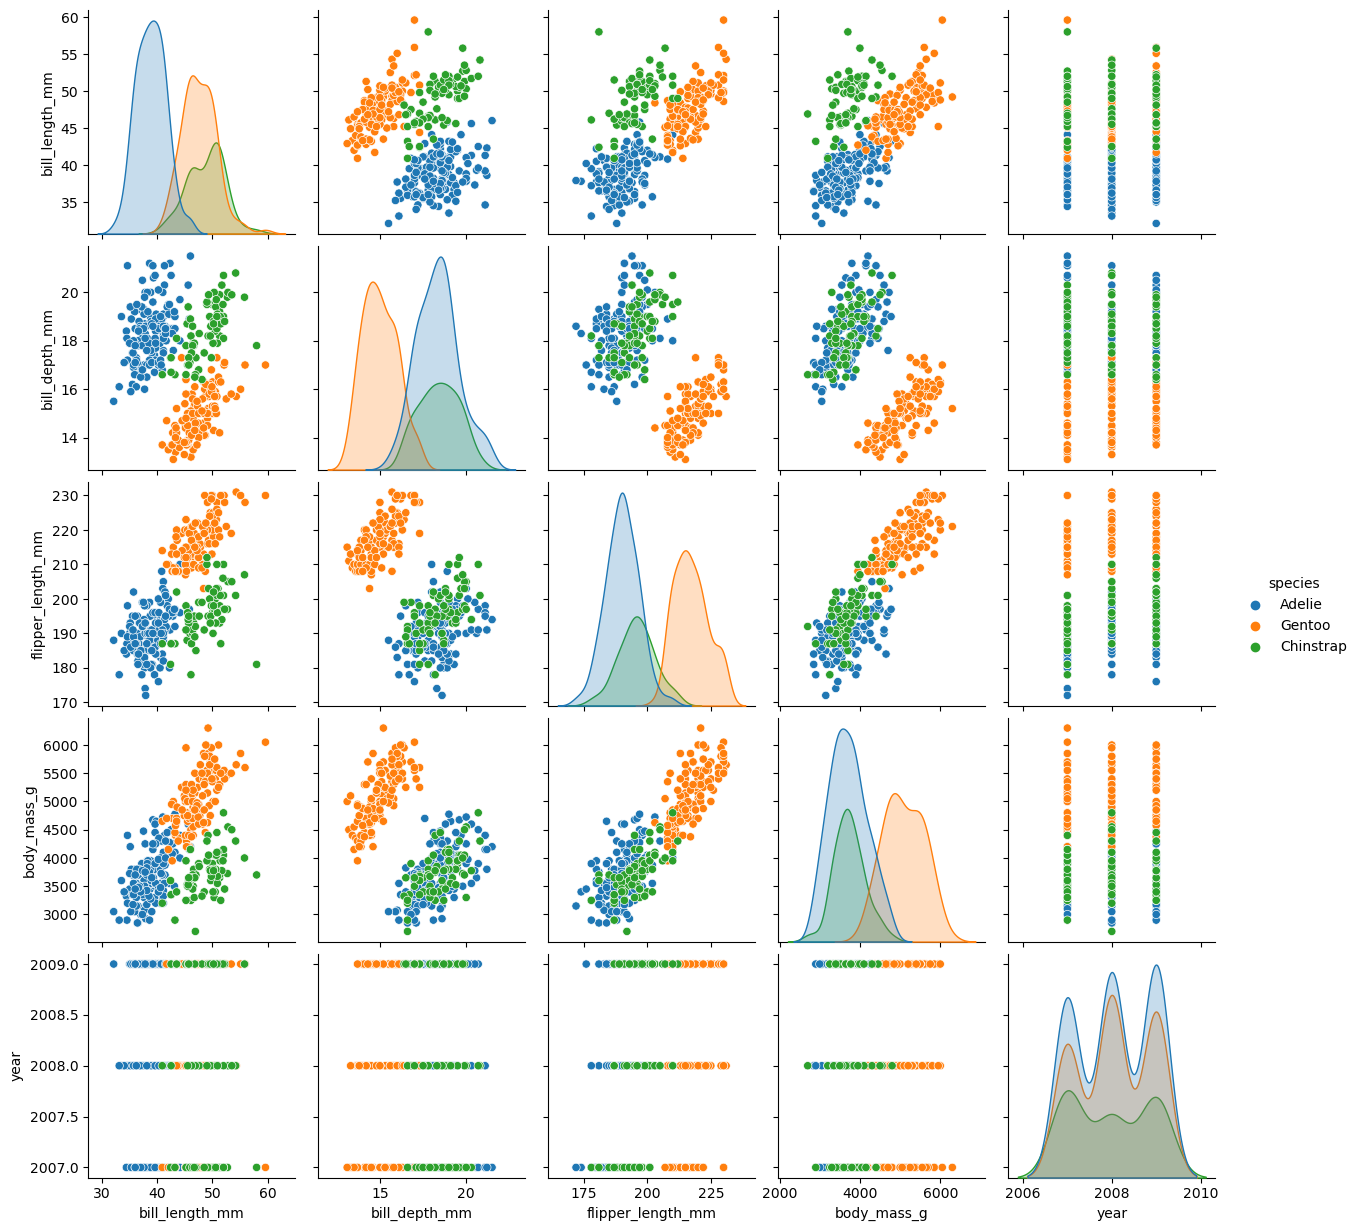

In [101]:
sns.pairplot(data=data,hue='species')  ## for whole data

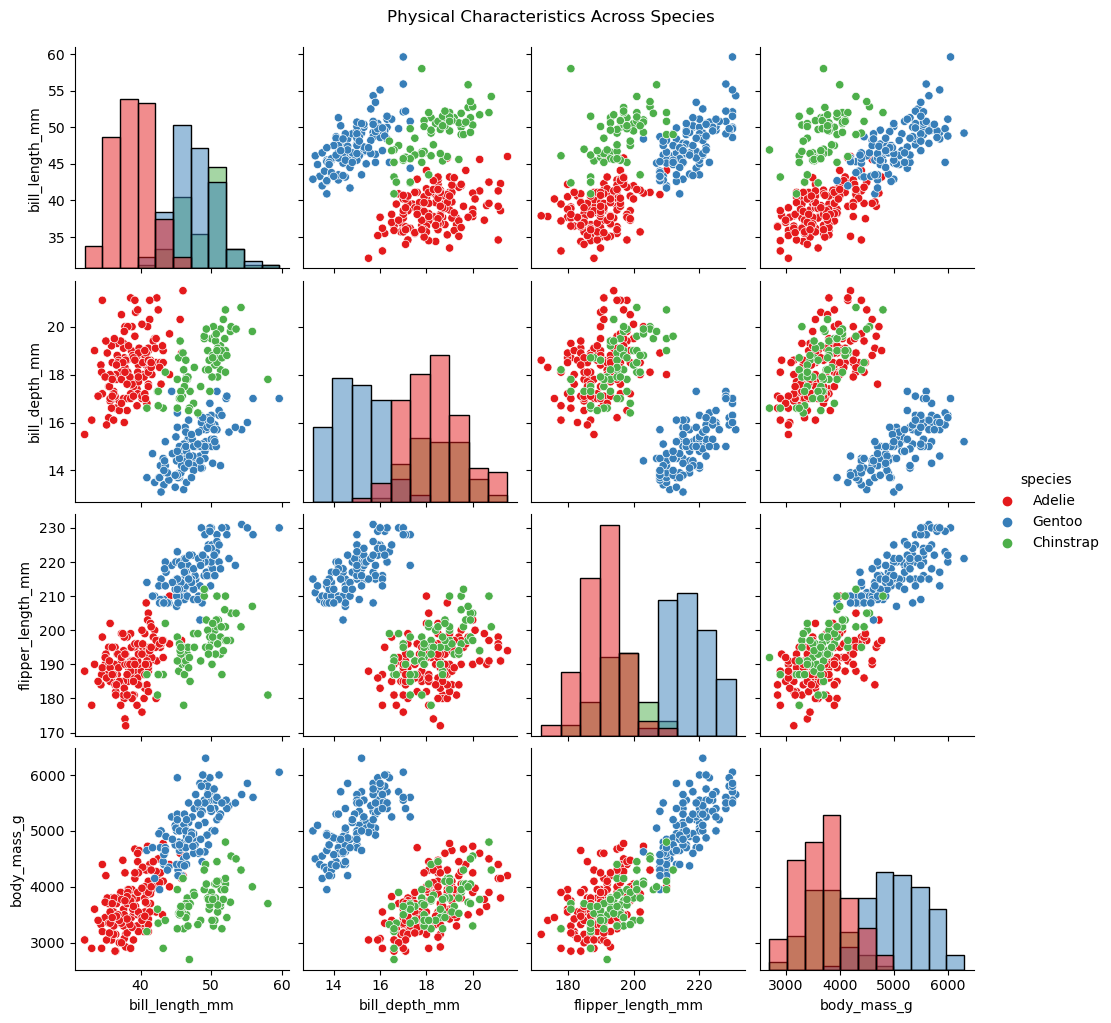

In [102]:
# Visualization: Physical Characteristics Across Species
sns.pairplot(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1',diag_kind="hist")
plt.suptitle('Physical Characteristics Across Species', y=1.02)
plt.show()

In [103]:
#sns.pairplot(data)
pd.melt(data)  ## transform the dataset from wide format to long format. 
melted_data = pd.melt(data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

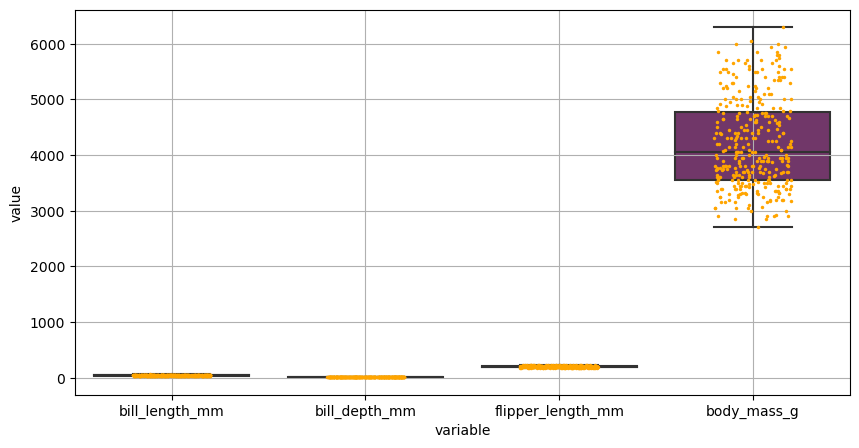

In [104]:
plt.figure(figsize=(10,5))
sns.boxplot(x="variable", y="value", data=melted_data, palette='flare')
sns.stripplot(x="variable", y="value", data=melted_data, color="orange", jitter=0.2, size=2.5)
plt.grid()
plt.show()

- It shows individual measurements, providing insight into the data density and distribution.

#### The presence of outliers in body mass might require further investigation. Are these data errors, or do they represent natural variations?
#### It's also important to consider the ecological and biological relevance of these measurements, which could provide insights into environmental adaptations, feeding habits, or reproductive strategies among different penguin species.

## Finding avg. bill length in each species: 

In [105]:
avg_bill_length= data.groupby(["species"])

In [106]:
avg_bill_length.mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384,2008.054795
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.568067,14.996639,217.235294,5092.436975,2008.067227


In [107]:
#avg_bill_length.std()
data.groupby('species').agg({'bill_length_mm': ['mean', 'std']})

bill_length_mm          
                    mean       std
species                           
Adelie         38.823973  2.662597
Chinstrap      48.833824  3.339256
Gentoo         47.568067  3.106116

In [108]:
data.groupby(["sex", "species"])["bill_length_mm"].mean()

sex     species  
female  Adelie       37.257534
        Chinstrap    46.573529
        Gentoo       45.563793
male    Adelie       40.390411
        Chinstrap    51.094118
        Gentoo       49.473770
Name: bill_length_mm, dtype: float64

In [109]:
data.groupby(['island','species', 'sex']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species   sex                                                        
Biscoe    Adelie    female       37.359091      17.704545         187.181818   
                    male         40.590909      19.036364         190.409091   
          Gentoo    female       45.563793      14.237931         212.706897   
                    male         49.473770      15.718033         221.540984   
Dream     Adelie    female       36.911111      17.618519         187.851852   
                    male         40.071429      18.839286         191.928571   
          Chinstrap female       46.573529      17.588235         191.735294   
                    male         51.094118      19.252941         199.911765   
Torgersen Adelie    female       37.554167      17.550000         188.291667   
                    male         40.586957      19.391304         194.913043   

                            body_mass_g         year  
island    species   sex                               
Biscoe    Adelie    female  3369.318182  2008.136364  
                    male    4050.000000  2008.136364  
          Gentoo    female  4679.741379  2008.068966  
                    male    5484.836066  2008.065574  
Dream     Adelie    female  3344.444444  2008.037037  
                    male    4045.535714  2008.000000  
          Chinstrap female  3527.205882  2007.970588  
                    male    3938.970588  2007.970588  
Torgersen Adelie    female  3395.833333  2008.000000  
                    male    4034.782609  2008.043478

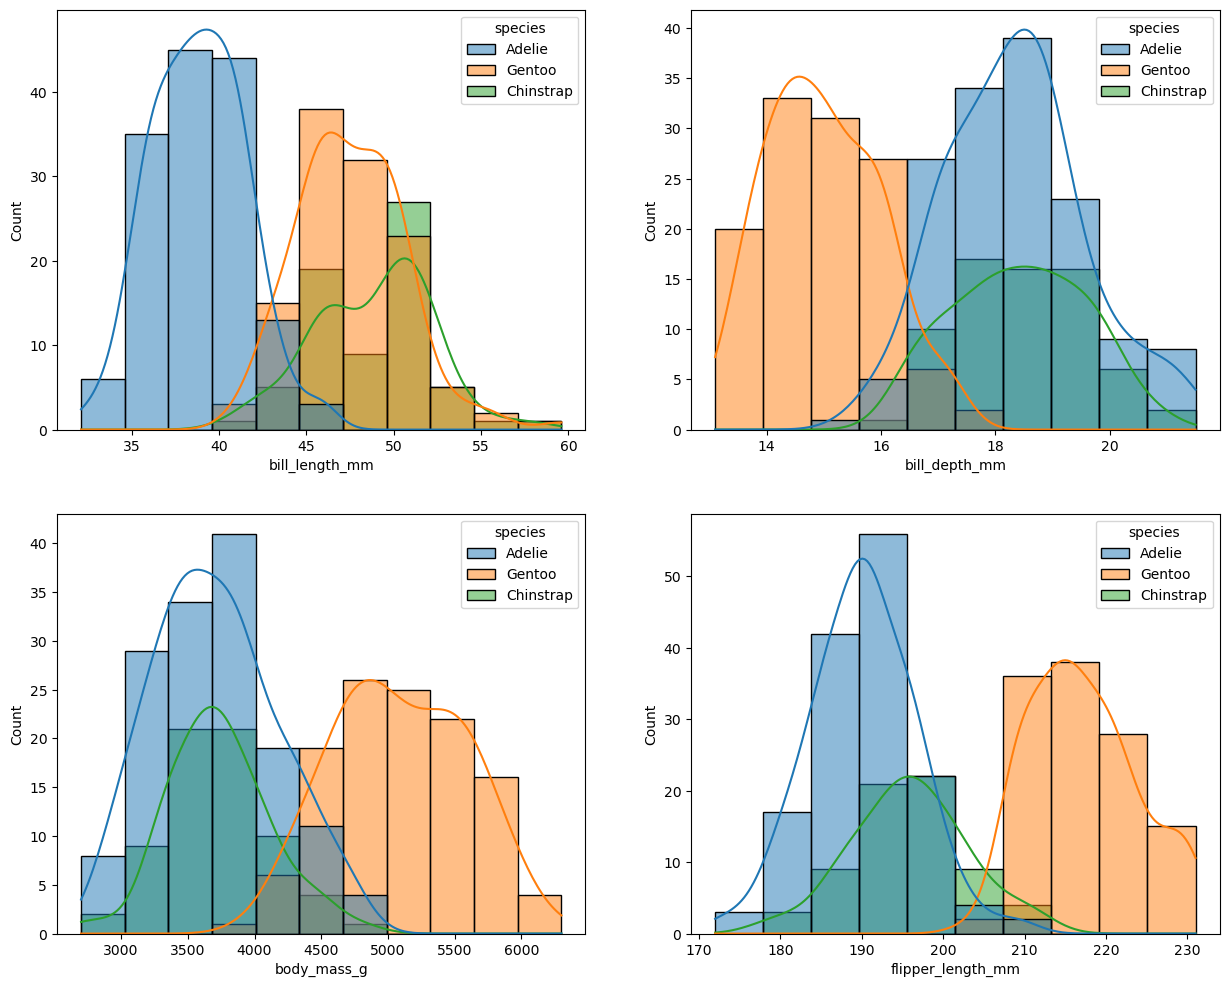

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Histograms for numerical features
sns.histplot(data=data, x="bill_length_mm", hue="species", ax=axes[0, 0], kde=True)
sns.histplot(data=data, x="bill_depth_mm", hue="species", ax=axes[0, 1], kde=True)
sns.histplot(data=data, x="flipper_length_mm", hue="species", ax=axes[1,1], kde=True)
sns.histplot(data=data, x="body_mass_g", hue="species", ax=axes[1, 0], kde=True)

#plt.tight_layout()
plt.show()

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

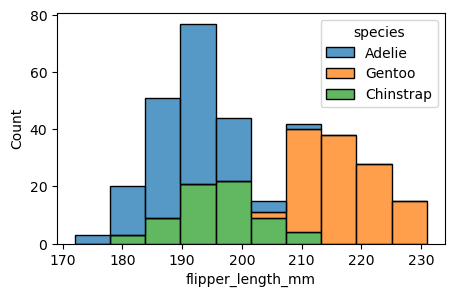

In [111]:
plt.figure(figsize=(5,3))
sns.histplot(data, x="flipper_length_mm", hue="species", multiple="stack",)   ### species wise

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

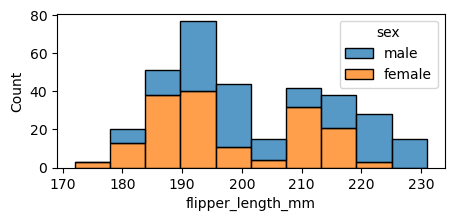

In [112]:
plt.figure(figsize=(5,2))
sns.histplot(data, x="flipper_length_mm", hue="sex" ,multiple="stack",)  ##gender wise

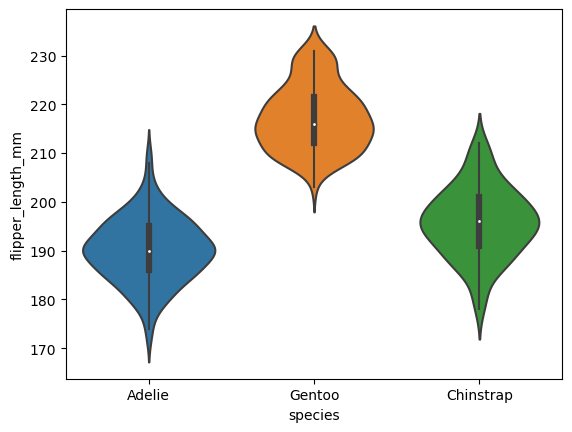

In [113]:
sns.violinplot(data=data, x="species", y="flipper_length_mm", size=5)
plt.show()

In [114]:
df["MALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "MALE" else np.nan, axis = 1)
df["FEMALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "FEMALE" else np.nan, axis = 1)
fig, axes = joypy.joyplot(df, 
                          column=['FEMALE_flipper', 'MALE_flipper'],
                          by = "species",
                          ylim = 'own',
                          figsize = (12,8), 
                          legend = True
                         )

NameError: name 'df' is not defined

In [ ]:
##individual boxplots for each physical characteristic by species.

# # Visualization: Physical Characteristics by Species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Physical Characteristics of Penguins by Species', fontsize=16)

## Bill Length
sns.boxplot(ax=axes[0, 0], data=data, x='species', y='bill_length_mm', palette='Pastel1')
axes[0, 0].set_title('Bill Length (mm)')

## Bill Depth
sns.boxplot(ax=axes[0, 1], data=data, x='species', y='bill_depth_mm', palette='Pastel2')
axes[0, 1].set_title('Bill Depth (mm)')

## Flipper Length
sns.boxplot(ax=axes[1, 0], data=data, x='species', y='flipper_length_mm', palette='Set3')
axes[1, 0].set_title('Flipper Length (mm)')

## Body Mass
sns.boxplot(ax=axes[1, 1], data=data, x='species', y='body_mass_g', palette='Set2')
axes[1, 1].set_title('Body Mass (g)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
data

## Data Manipulations

In [ ]:
# Group the data by 'island' and 'sex' and count the occurrences
counts = data.groupby(['island', 'sex']).size().unstack()
# Print the counts
print("Counts of female and male penguins separated by island:")
print(counts)

In [ ]:
data['island'].value_counts()  ## count of penguins in each island

- Less number of penguins are recorded in Torgersen island.

In [ ]:
data['species'].nunique() ## for count

In [ ]:
#data['species'].nunique() ## for count
data['species'].unique() ## to see what are those 3

In [ ]:
data.groupby(["species"]).count()

In [ ]:
island_genders =data[['island', 'sex']]
island_genders.head()

In [ ]:
#data.iloc[:,[1,6]] ## selecting particular columns..
#choosing body mass and penguin

## Filtering with Logical Operators
# 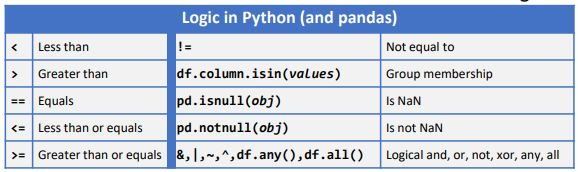

In [ ]:
bodymass = data["body_mass_g"] < 3400
sexm = data["sex"] == "male"
data[bodymass & sexm]

In [ ]:
bodymass = data["body_mass_g"] < 3400
billdepthmm = data["bill_depth_mm"] == 20
data[bodymass & billdepthmm ]

In [ ]:
bodymass = data["body_mass_g"] < 2900
billdepthmm = data["bill_depth_mm"] == 20
data[bodymass | billdepthmm ]

## correlation between numerical variables:

In [ ]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.3) ## just 2 numbers after plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
correlation_matrix = data_encoded.corr()
#print("Correlation Matrix:\n", correlation_matrix)  ## caterorial values to num

In [ ]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.3) ## just 2 numbers after plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#data_encoded.head(2) ## how it encoded

## Few more visualisations: 

In [ ]:
## Species Based Gender 
import plotly.express as px
px.bar( data_frame=data, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=600,height=400 )

In [ ]:
fig =px.bar( data_frame=data, y = 'sex',
facet_row='species',facet_row_spacing=0.10,
pattern_shape='species',
color='species',
color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
width=500,height=300 )
fig.show()

In [ ]:
## plot based on gender
fig = px.scatter(data_frame=data, x='flipper_length_mm' , y = 'body_mass_g', 
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=300,title='Species based Gender scatter plot', 
                   titlefont = dict(size =36, color='black', family='Open Sans',), 
                   font=dict(size=14,color='black'))
fig.show()

## Recommendations for Improvement and Next Steps:
Data Cleaning: Further inspection of data quality might be needed. For instance, handling outliers if any are detected in physical measurements.

Feature Engineering: Consider creating new features that might help improve model performance, such as interactions between features or polynomial features.

Model Expansion: Experiment with other models like Decision Trees, Random Forest, or ensemble methods to see if they offer better performance.

In-depth Analysis: More detailed analysis of model misclassifications could provide insights into where models fail and how they might be improved.

Model Interpretability: Utilize tools or techniques to interpret model decisions, which is critical in making your findings actionable and trustworthy.

# 2.  Unsupervised

- Clustering goal is to, preficting the type of penguin, groupings among penguins based on their physical characteristics (such as bill length, bill depth, flipper length, body mass, and potentially where they were found or their sex), then the year the data was collected may not provide meaningful insight into these clusters.
- Year is not contributing to the clustering/ in predicting the type

### Step 1: Feature Selection and Data Preparation
Selecting relevant features for clustering, ensuring they are scaled to prevent any feature from disproportionately influencing the results.

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'data' has been loaded and contains the relevant features
features = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Step 2: Determine Optimal Number of Clusters
Using the Elbow Method, determine the most appropriate number of clusters for K-means clustering.

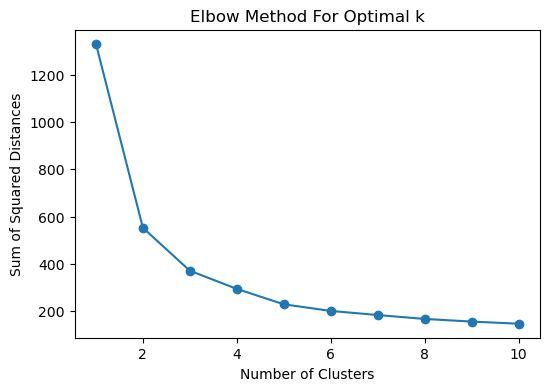

In [119]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Step 3: Apply K-Means Clustering
Using the identified optimal number of clusters, apply K-means to segment the data.

In [ ]:
# Let's assume the elbow method shows that k=3 is a good choice
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# For visualization and analysis, we can temporarily store the cluster assignments
data['Cluster'] = clusters  

### Step 4: Visualization and Analysis of Clusters
Visualize and interpret how the clusters are formed based on the scaled features.

In [ ]:
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot with K-means Clustering')
plt.show()

# Remove the cluster column after analysis to maintain data integrity
data.drop('Cluster', axis=1, inplace=True)

### Step 5: Validate and Interpret Clusters
Assess how these clusters relate to known variables like species or geographic location.

In [ ]:
# Temporarily reinsert cluster for cross-tabulation
data['Cluster'] = clusters

# Cross-tabulation of clusters and species to see the correlation
cluster_species = pd.crosstab(data['Cluster'], data['species'])
print(cluster_species)

# Cross-tabulation of clusters and islands
cluster_islands = pd.crosstab(data['Cluster'], data['island'])
print(cluster_islands)

# Clean up by removing the cluster column again
data.drop('Cluster', axis=1, inplace=True)